In [81]:
#%matplotlib inline
%matplotlib nbagg
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import sklearn #機械学習のライブラリ

In [68]:
#SOM人工データ
x = np.arange(-3, 3, 0.1)
n = len(x)

y = np.sin(x)

X = np.stack([x, y], 1)
X

array([[-3.00000000e+00, -1.41120008e-01],
       [-2.90000000e+00, -2.39249329e-01],
       [-2.80000000e+00, -3.34988150e-01],
       [-2.70000000e+00, -4.27379880e-01],
       [-2.60000000e+00, -5.15501372e-01],
       [-2.50000000e+00, -5.98472144e-01],
       [-2.40000000e+00, -6.75463181e-01],
       [-2.30000000e+00, -7.45705212e-01],
       [-2.20000000e+00, -8.08496404e-01],
       [-2.10000000e+00, -8.63209367e-01],
       [-2.00000000e+00, -9.09297427e-01],
       [-1.90000000e+00, -9.46300088e-01],
       [-1.80000000e+00, -9.73847631e-01],
       [-1.70000000e+00, -9.91664810e-01],
       [-1.60000000e+00, -9.99573603e-01],
       [-1.50000000e+00, -9.97494987e-01],
       [-1.40000000e+00, -9.85449730e-01],
       [-1.30000000e+00, -9.63558185e-01],
       [-1.20000000e+00, -9.32039086e-01],
       [-1.10000000e+00, -8.91207360e-01],
       [-1.00000000e+00, -8.41470985e-01],
       [-9.00000000e-01, -7.83326910e-01],
       [-8.00000000e-01, -7.17356091e-01],
       [-7.

<IPython.core.display.Javascript object>


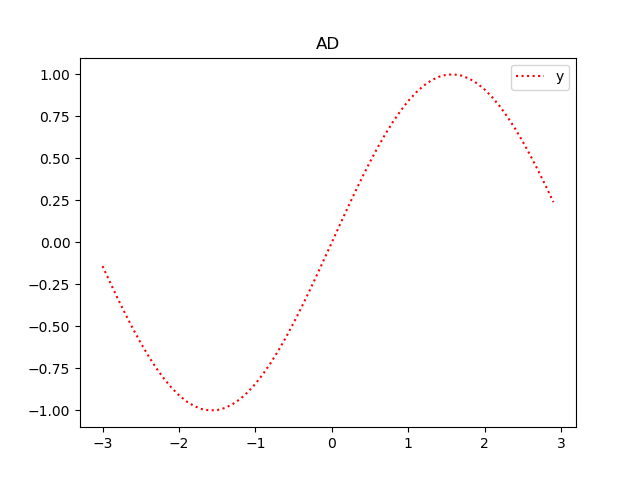

In [70]:
plt.plot(x, y,'r:',label="y")
plt.title('AD')
plt.legend()
plt.show()

In [87]:
#近傍半径の設定
sig_zero = 1.0
sig_min = 0.05
Tau = 50.0
sig = 0
sig_t = []

#for sig > sig_min:
for t in range(n):
    sig_max = sig_zero-(sig_zero-sig_min) * t / Tau
    if sig_max > sig_min:
        sig = sig_max
    else:
        sig = sig_min
    sig_t.append(sig)
    sig_zero = sig_max
print(sig_t)
len(sig_t)

[1.0, 0.981, 0.9437599999999999, 0.8901344, 0.822923648, 0.7456312831999999, 0.662155529216, 0.57645375512576, 0.4922211543056384, 0.4126213465306235, 0.3400970772244988, 0.27627572023510905, 0.22196954737868288, 0.17725746506022533, 0.14162537484336224, 0.11413776239035357, 0.09361367842544044, 0.07878502776079069, 0.06842241776690604, 0.06142189901548174, 0.056853139409289044, 0.05397482085738765, 0.052225899680137085, 0.051201985827274026, 0.0506250326301825, 0.050312516315091246, 0.0501500078312438, 0.050069003602372146, 0.050030361585043745, 0.05001275186571837, 0.05000510074628735, 0.050001938283589197, 0.05000069778209211, 0.05000023724591132, 0.05000007591869163, 0.05000002277560749, 0.0500000063771701, 0.05000000165806423, 0.05000000039793542, 0.05000000008754579, 0.050000000017509164, 0.05000000000315165, 0.050000000000504266, 0.0500000000000706, 0.050000000000008475, 0.05000000000000085, 0.05000000000000007, 0.05000000000000001, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05, 0.05

60

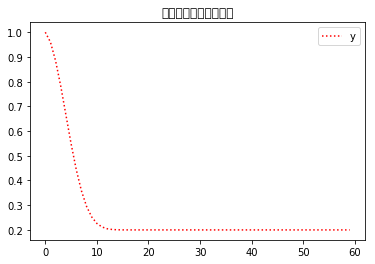

In [74]:
a = np.arange(60)
plt.plot(a, sig_t,'r:',label="y")
plt.title('近傍半径スケジュール')
plt.legend()
plt.show()

In [75]:
#ノード設定
K = 50
l = 1
zeta = np.linspace(-1,1,K)
zeta = np.reshape(zeta, (50,1))
print(zeta)

[[-1.        ]
 [-0.95918367]
 [-0.91836735]
 [-0.87755102]
 [-0.83673469]
 [-0.79591837]
 [-0.75510204]
 [-0.71428571]
 [-0.67346939]
 [-0.63265306]
 [-0.59183673]
 [-0.55102041]
 [-0.51020408]
 [-0.46938776]
 [-0.42857143]
 [-0.3877551 ]
 [-0.34693878]
 [-0.30612245]
 [-0.26530612]
 [-0.2244898 ]
 [-0.18367347]
 [-0.14285714]
 [-0.10204082]
 [-0.06122449]
 [-0.02040816]
 [ 0.02040816]
 [ 0.06122449]
 [ 0.10204082]
 [ 0.14285714]
 [ 0.18367347]
 [ 0.2244898 ]
 [ 0.26530612]
 [ 0.30612245]
 [ 0.34693878]
 [ 0.3877551 ]
 [ 0.42857143]
 [ 0.46938776]
 [ 0.51020408]
 [ 0.55102041]
 [ 0.59183673]
 [ 0.63265306]
 [ 0.67346939]
 [ 0.71428571]
 [ 0.75510204]
 [ 0.79591837]
 [ 0.83673469]
 [ 0.87755102]
 [ 0.91836735]
 [ 0.95918367]
 [ 1.        ]]


In [45]:
len(zeta)

50

In [77]:
#潜在変数の初期化
zn = np.random.rand(n)
zn = np.reshape(zn, (n,1))
zn

array([[0.59765531],
       [0.41958786],
       [0.98593161],
       [0.15820215],
       [0.20951081],
       [0.14582441],
       [0.56488858],
       [0.16313471],
       [0.62387027],
       [0.94263029],
       [0.06101724],
       [0.83499127],
       [0.20702948],
       [0.8531004 ],
       [0.68281416],
       [0.65940259],
       [0.04317461],
       [0.50901566],
       [0.64887918],
       [0.06392272],
       [0.89442582],
       [0.28730407],
       [0.23822647],
       [0.4059463 ],
       [0.15117592],
       [0.98251882],
       [0.36378687],
       [0.86969851],
       [0.32696429],
       [0.36230723],
       [0.5009931 ],
       [0.50071237],
       [0.34592456],
       [0.14210651],
       [0.0461971 ],
       [0.94211265],
       [0.22131865],
       [0.62975263],
       [0.62823043],
       [0.76513734],
       [0.51621911],
       [0.36534106],
       [0.01833414],
       [0.63466287],
       [0.04035643],
       [0.7995065 ],
       [0.61500017],
       [0.121

In [47]:
len(zn)

60

In [79]:
#学習率初期設定
h_kn = np.zeros((n,K))
np.size(h_kn,axis=0)

60

In [51]:
K

50

In [53]:
time = 0
for data in range(n):
        for node in range(K):
            h_kn[data][node] = np.exp( -1 / (2*np.power(sig_t[time], 2)) * np.power(zn[data]-zeta[node],2))
h_kn

array([[0.31298502, 0.33279769, 0.35327551, ..., 0.92525852, 0.9097337 ,
        0.89298045],
       [0.14302479, 0.15488484, 0.16744918, ..., 0.99855341, 0.99991561,
        0.99961296],
       [0.44329374, 0.46659571, 0.49030506, ..., 0.81334276, 0.79162079,
        0.76919642],
       ...,
       [0.16637524, 0.1795972 , 0.19354719, ..., 0.99970176, 0.99787407,
        0.99439171],
       [0.14747999, 0.15960773, 0.17244524, ..., 0.99927094, 0.99999656,
        0.99905691],
       [0.30813037, 0.32777246, 0.34808627, ..., 0.92894541, 0.91373988,
        0.89728714]])

In [54]:
h_kn[:,0]

array([0.31298502, 0.14302479, 0.44329374, 0.41512684, 0.18094443,
       0.59798993, 0.35428775, 0.25997327, 0.49990892, 0.46436431,
       0.26957053, 0.1597906 , 0.16754928, 0.25404579, 0.42050854,
       0.19182595, 0.33651385, 0.44095053, 0.14210022, 0.54529536,
       0.41677465, 0.24650781, 0.29417839, 0.26278794, 0.47946125,
       0.23320728, 0.55098337, 0.14153385, 0.45932659, 0.43117276,
       0.1529612 , 0.47680749, 0.30492335, 0.4656463 , 0.25328747,
       0.47884944, 0.39789171, 0.35926487, 0.56668873, 0.22375263,
       0.29763179, 0.28549847, 0.44652442, 0.42904246, 0.23195972,
       0.17443086, 0.15614   , 0.55388026, 0.21715041, 0.39617524,
       0.59005911, 0.52771562, 0.13918307, 0.24964066, 0.2330228 ,
       0.14735399, 0.24843684, 0.16637524, 0.14747999, 0.30813037])

In [55]:
sum(h_kn[:,0])

19.741888047985654

In [56]:
#ノード毎学習率合計変数の初期設定
g_k = np.zeros((K))
g_k = np.reshape(g_k,(K,1))
g_k[0]

array([0.])

In [57]:
for node in range(K):
    g_k[node] = np.sum(h_kn[:,node])
np.size(g_k)

50

In [58]:
#参照ベクトル初期設定
y_k = np.zeros((K,2))
y_k = np.reshape(y_k, (K,2))
y_k[0]

array([0., 0.])

In [59]:
#参照ベクトル計算の中で使う変数の初期設定
h_X = np.zeros((n,2))
h_X = np.reshape(h_X, (n,2))
h_X[0]

array([0., 0.])

In [60]:
X[0]

array([-3.        , -0.14112001])

In [61]:
for data in range(n):
    h_X[data] = h_kn[data][0]*X[data]
print(h_X)
np.sum(h_X,axis=0)

[[-9.38955050e-01 -4.41684481e-02]
 [-4.14771878e-01 -3.42185840e-02]
 [-1.24122247e+00 -1.48498149e-01]
 [-1.12084247e+00 -1.77416860e-01]
 [-4.70455517e-01 -9.32771017e-02]
 [-1.49497482e+00 -3.57880314e-01]
 [-8.50290593e-01 -2.39308328e-01]
 [-5.97938531e-01 -1.93863426e-01]
 [-1.09979963e+00 -4.04174565e-01]
 [-9.75165050e-01 -4.00843622e-01]
 [-5.39141061e-01 -2.45119790e-01]
 [-3.03602149e-01 -1.51209863e-01]
 [-3.01588695e-01 -1.63167465e-01]
 [-4.31877847e-01 -2.51928272e-01]
 [-6.72813663e-01 -4.20329236e-01]
 [-2.87738928e-01 -1.91345425e-01]
 [-4.71119385e-01 -3.31617479e-01]
 [-5.73235693e-01 -4.24881495e-01]
 [-1.70520260e-01 -1.32442956e-01]
 [-5.99824893e-01 -4.85971236e-01]
 [-4.16774651e-01 -3.50703776e-01]
 [-2.21857029e-01 -1.93096201e-01]
 [-2.35342711e-01 -2.11030659e-01]
 [-1.83951558e-01 -1.69292639e-01]
 [-2.87676751e-01 -2.70724187e-01]
 [-1.16603642e-01 -1.11805528e-01]
 [-2.20393350e-01 -2.14563033e-01]
 [-4.24601561e-02 -4.18261137e-02]
 [-9.18653173e-02 -9

array([-2.55718659, -0.08970806])

In [62]:
h_X = np.zeros((n,2))
h_X = np.reshape(h_X, (n,2))
for node in range(K):
    for data in range(n):
        h_X[data] = h_kn[data][node]*X[data]
    y_k[node] = 1/g_k[node] * np.sum(h_X,axis=0)
#h_X
#np.size(y_k,axis=0)
y_k

array([[-0.129531  , -0.00454405],
       [-0.12806319, -0.00466219],
       [-0.12656329, -0.0047727 ],
       [-0.12503146, -0.00487557],
       [-0.12346784, -0.00497082],
       [-0.1218726 , -0.00505845],
       [-0.12024595, -0.00513848],
       [-0.11858807, -0.00521091],
       [-0.1168992 , -0.00527576],
       [-0.11517958, -0.00533306],
       [-0.11342946, -0.00538284],
       [-0.11164913, -0.00542511],
       [-0.10983886, -0.00545992],
       [-0.10799899, -0.00548731],
       [-0.10612982, -0.0055073 ],
       [-0.1042317 , -0.00551994],
       [-0.102305  , -0.00552528],
       [-0.1003501 , -0.00552338],
       [-0.09836737, -0.00551428],
       [-0.09635724, -0.00549803],
       [-0.09432013, -0.00547471],
       [-0.09225648, -0.00544438],
       [-0.09016675, -0.0054071 ],
       [-0.0880514 , -0.00536294],
       [-0.08591092, -0.00531198],
       [-0.08374583, -0.00525429],
       [-0.08155662, -0.00518996],
       [-0.07934382, -0.00511907],
       [-0.07710799,

In [63]:
#潜在変数初期設定
k_n = np.zeros((n))
k_n = np.reshape(k_n, (n,1))
k_n[0]

array([0.])

In [64]:
#潜在変数計算の中で使う
xn_yk = np.zeros((K))
xn_yk

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [65]:
for data in range(n):
        xn_yk_min = np.power(X[data][0] - y_k[0][0], 2) + np.power(X[data][1] - y_k[0][1], 2)
        #print(xn_yk_min)
        Nd = 0
        for node in range(1,K):
            xn_yk = np.power(X[data][0] - y_k[node][0], 2) + np.power(X[data][1] - y_k[node][1], 2)
            if xn_yk_min > xn_yk:
                xn_yk_min = xn_yk
                Nd = node
        k_n[data] = Nd
k_n

array([[ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [ 0.],
       [17.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.],
       [49.]])

In [66]:
zeta[0]

array([-1.])

<IPython.core.display.Javascript object>


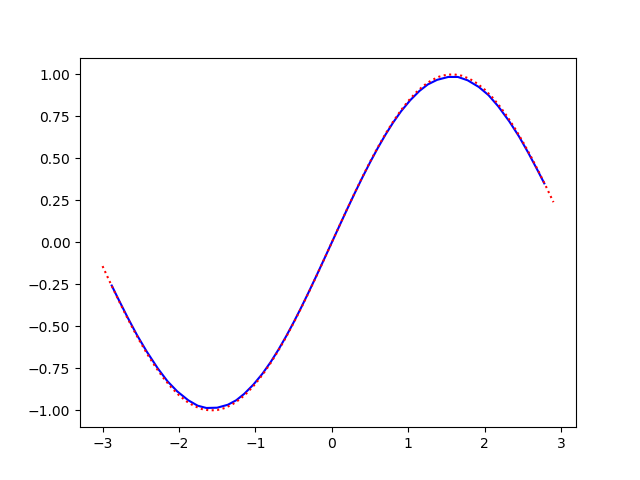

In [88]:
T = 60
fig = plt.figure()
ims = []

for time in range(T):
    for data in range(n):
        for node in range(K):
            h_kn[data][node] = np.exp( -1 / (2*np.power(sig_t[time], 2)) * np.power(zn[data]-zeta[node],2))
    
    for node in range(K):
        g_k[node] = np.sum(h_kn[:,node])
    
    for node in range(K):
        for data in range(n):
            h_X[data] = h_kn[data][node]*X[data]
        y_k[node] = 1/g_k[node] * np.sum(h_X,axis=0)
    
    for data in range(n):
        xn_yk_min = np.power(X[data][0] - y_k[0][0], 2) + np.power(X[data][1] - y_k[0][1], 2)
        Nd = 0
        for node in range(1,K):
            xn_yk = np.power(X[data][0] - y_k[node][0], 2) + np.power(X[data][1] - y_k[node][1], 2)
            if xn_yk_min > xn_yk:
                xn_yk_min = xn_yk
                Nd = node
        k_n[data] = Nd
        
    for data in range(n):
        zn[data] = zeta[int(k_n[data])]    
    #print(time)
    im = plt.plot(y_k[:,0] ,y_k[:,1] ,c = "b")
    ims.append(im)
    
#print(h_kn)
#print(g_k)
#print(y_k)
#print(k_n)

ani = animation.ArtistAnimation(fig, ims, interval = 100)
plt.plot(x, y,'r:',label="y")
plt.show()

In [89]:
y_k

array([[ 2.77994282e+00,  3.51290837e-01],
       [ 2.69699314e+00,  4.24864591e-01],
       [ 2.57100309e+00,  5.32869627e-01],
       [ 2.44932104e+00,  6.30340630e-01],
       [ 2.32296994e+00,  7.19444393e-01],
       [ 2.17698731e+00,  8.09904818e-01],
       [ 2.04999998e+00,  8.76192583e-01],
       [ 1.92301142e+00,  9.24848492e-01],
       [ 1.77698860e+00,  9.64550096e-01],
       [ 1.65000126e+00,  9.84317244e-01],
       [ 1.52305457e+00,  9.84290793e-01],
       [ 1.37768385e+00,  9.67217703e-01],
       [ 1.25556879e+00,  9.39788352e-01],
       [ 1.14697202e+00,  9.01295934e-01],
       [ 1.02542613e+00,  8.45690836e-01],
       [ 9.06554543e-01,  7.80479527e-01],
       [ 8.00794731e-01,  7.12391361e-01],
       [ 7.00047332e-01,  6.39427636e-01],
       [ 6.00001410e-01,  5.60422556e-01],
       [ 5.00000021e-01,  4.75841823e-01],
       [ 4.00000000e-01,  3.86507422e-01],
       [ 3.00000000e-01,  2.93311179e-01],
       [ 2.00000000e-01,  1.97184268e-01],
       [ 1.